In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
# Load the dataset from the CSV file
file_path = '/content/drive/MyDrive/Cancer ieee/cancer_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

**EDA(Exploratory data Analysis)**

In [9]:
#Print the columns in the DataFrame
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['Wavelength', 'INOK-1', 'INOK-2', 'INOK-3', 'INOK-4', 'INOK-5',
       'YD10B-1', 'YD10B-2', 'YD10B-3', 'YD10B-4', 'YD10B-5'],
      dtype='object')


In [10]:
# Display descriptive statistics
print("Descriptive Statistics:\n", df.describe())

Descriptive Statistics:
         Wavelength       INOK-1       INOK-2       INOK-3       INOK-4  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean     11.325000     0.505387     0.421890     0.357837     0.234577   
std       0.043366     0.181007     0.138356     0.108291     0.057784   
min      11.250000     0.273661     0.240288     0.212672     0.153368   
25%      11.287500     0.349702     0.302193     0.263751     0.184007   
50%      11.325000     0.461582     0.390829     0.335178     0.224552   
75%      11.362500     0.635682     0.523956     0.439274     0.279736   
max      11.400000     0.927789     0.736858     0.599255     0.357483   

            INOK-5      YD10B-1      YD10B-2      YD10B-3      YD10B-4  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean      0.166007     3.602446     3.619464     3.627723     3.665352   
std       0.034567    12.001387    12.043012    12.063973    12.170594   
min       0.

In [11]:
# Display the first few rows of the dataset
print("First few rows of the dataset:\n", df.head())

First few rows of the dataset:
    Wavelength    INOK-1    INOK-2    INOK-3    INOK-4    INOK-5   YD10B-1  \
0    11.25000  0.273661  0.240288  0.212672  0.153368  0.115833  0.036445   
1    11.25015  0.273915  0.240497  0.212846  0.153475  0.115904  0.036573   
2    11.25030  0.274169  0.240706  0.213020  0.153582  0.115974  0.036702   
3    11.25045  0.274423  0.240916  0.213195  0.153690  0.116045  0.036831   
4    11.25060  0.274677  0.241125  0.213370  0.153797  0.116116  0.036961   

    YD10B-2   YD10B-3   YD10B-4   YD10B-5  
0  0.033145  0.031662  0.025558  0.024552  
1  0.033257  0.031766  0.025634  0.024623  
2  0.033368  0.031870  0.025710  0.024695  
3  0.033481  0.031975  0.025786  0.024767  
4  0.033594  0.032081  0.025863  0.024840  


In [12]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:\n", df.tail())

Last few rows of the dataset:
       Wavelength    INOK-1    INOK-2    INOK-3    INOK-4    INOK-5   YD10B-1  \
996     11.39940  0.921665  0.732511  0.596057  0.356000  0.236400  0.121159   
997     11.39955  0.923191  0.733594  0.596854  0.356370  0.236601  0.120565   
998     11.39970  0.924720  0.734680  0.597653  0.356740  0.236802  0.119976   
999     11.39985  0.926253  0.735768  0.598453  0.357111  0.237004  0.119391   
1000    11.40000  0.927789  0.736858  0.599255  0.357483  0.237206  0.118811   

       YD10B-2   YD10B-3   YD10B-4   YD10B-5  
996   0.142974  0.156151  0.260019  0.293023  
997   0.142210  0.155278  0.258127  0.290757  
998   0.141452  0.154412  0.256256  0.288517  
999   0.140701  0.153554  0.254405  0.286303  
1000  0.139956  0.152703  0.252576  0.284116  


In [13]:
# Display general information about the dataset
print("Info about the dataset:\n")
df.info()

Info about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wavelength  1001 non-null   float64
 1   INOK-1      1001 non-null   float64
 2   INOK-2      1001 non-null   float64
 3   INOK-3      1001 non-null   float64
 4   INOK-4      1001 non-null   float64
 5   INOK-5      1001 non-null   float64
 6   YD10B-1     1001 non-null   float64
 7   YD10B-2     1001 non-null   float64
 8   YD10B-3     1001 non-null   float64
 9   YD10B-4     1001 non-null   float64
 10  YD10B-5     1001 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [14]:

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Wavelength    0
INOK-1        0
INOK-2        0
INOK-3        0
INOK-4        0
INOK-5        0
YD10B-1       0
YD10B-2       0
YD10B-3       0
YD10B-4       0
YD10B-5       0
dtype: int64


In [15]:
# Normalize the 'Wavelength' column if needed
df['Wavelength'] = (df['Wavelength'] - df['Wavelength'].min()) / (df['Wavelength'].max() - df['Wavelength'].min())

**DATA VISUALIZATION**

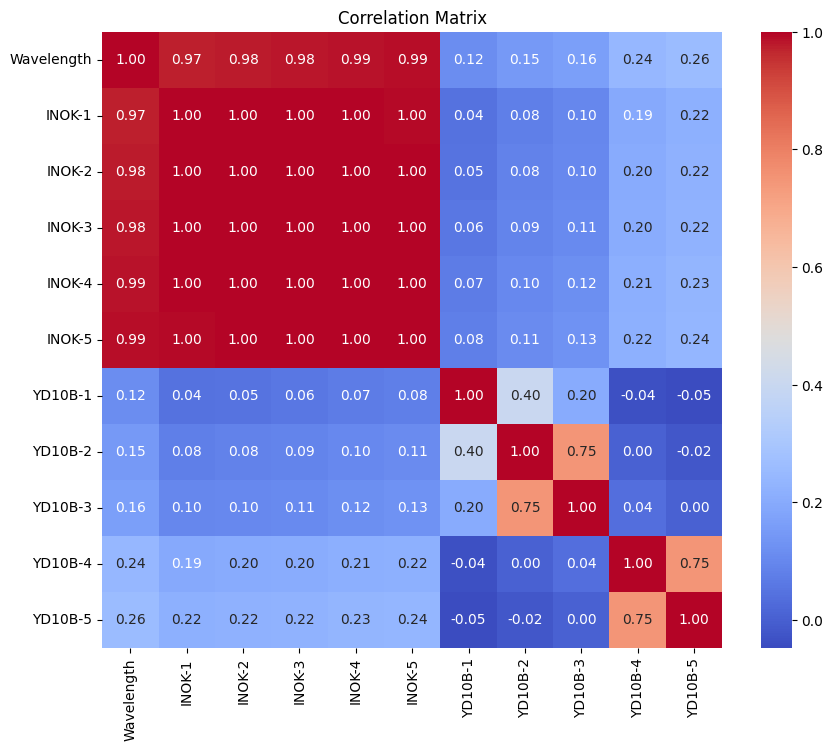

In [16]:
# Explore correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

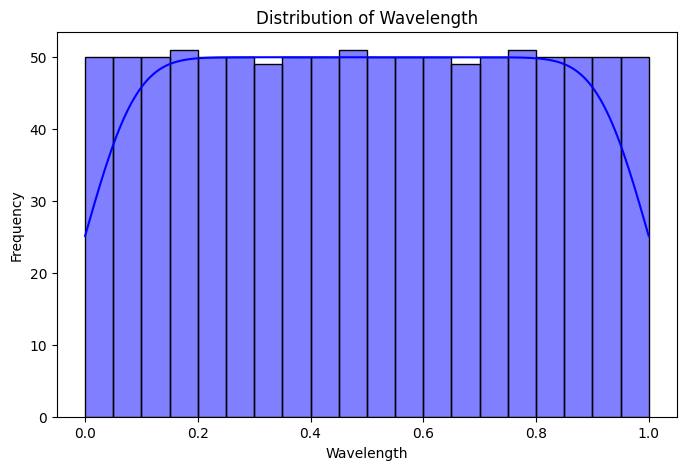

In [17]:
# Visualize the distribution of 'Wavelength'
plt.figure(figsize=(8, 5))
sns.histplot(df['Wavelength'], bins=20, kde=True, color='blue')
plt.title('Distribution of Wavelength')
plt.xlabel('Wavelength')
plt.ylabel('Frequency')
plt.show()

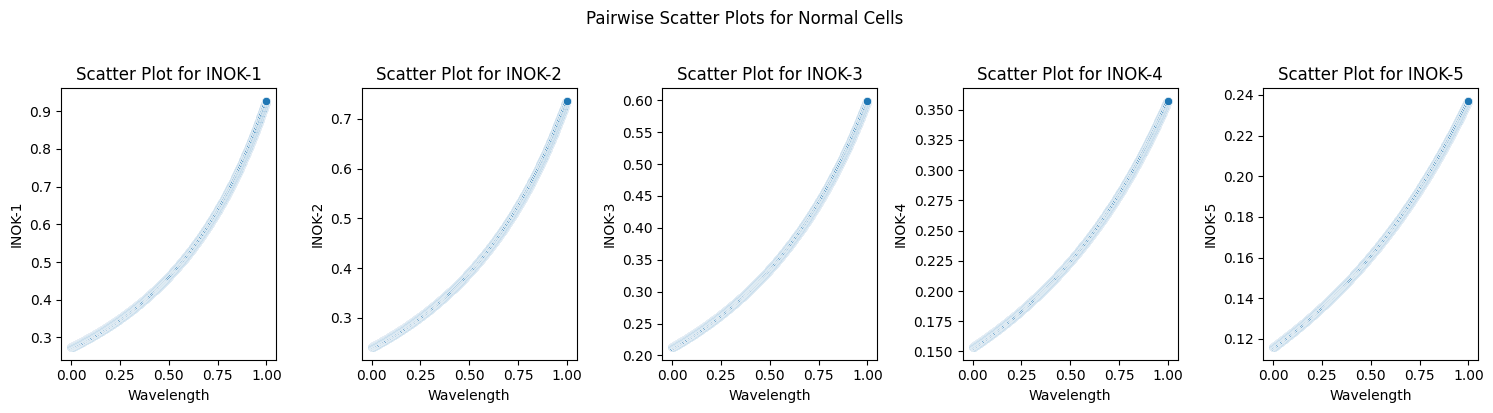

In [ ]:
columns_normal = ['INOK-1', 'INOK-2', 'INOK-3', 'INOK-4', 'INOK-5']

# Set up a custom grid
fig, axes = plt.subplots(1, len(columns_normal), figsize=(15, 4))  # Adjust figsize as needed

# Create pairwise scatter plots for normal cells
for i, column in enumerate(columns_normal):
    sns.scatterplot(data=df, x='Wavelength', y=column, ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {column}')

plt.suptitle('Pairwise Scatter Plots for Normal Cells', y=1.02)  # Adjust the y value for title position
plt.tight_layout()
plt.show()

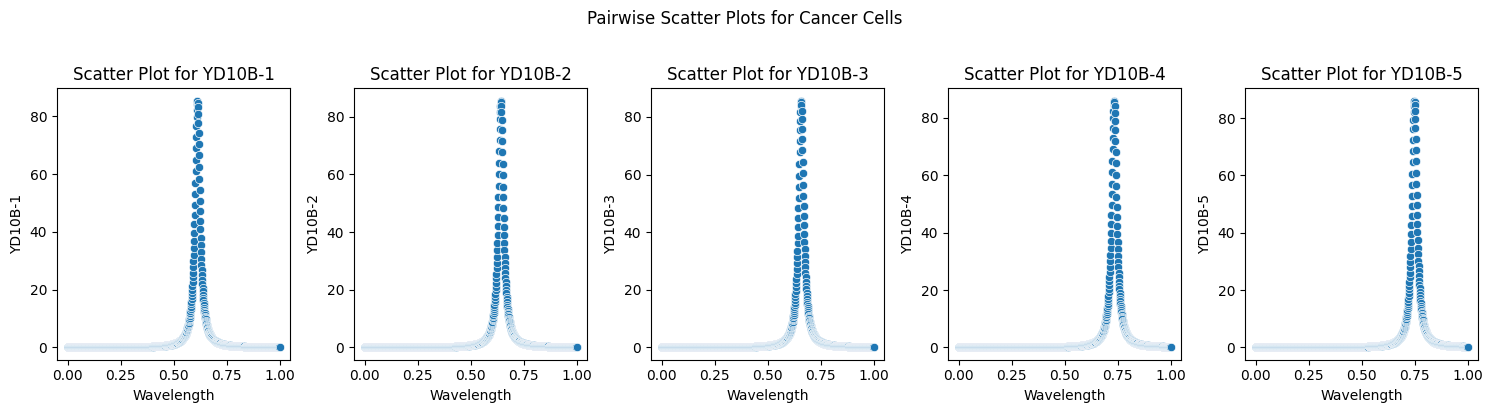

In [ ]:
columns_cancer = ['YD10B-1', 'YD10B-2', 'YD10B-3', 'YD10B-4', 'YD10B-5']

# Set up a custom grid
fig, axes = plt.subplots(1, len(columns_cancer), figsize=(15, 4))  # Adjust figsize as needed

# Create pairwise scatter plots for cancer cells
for i, column in enumerate(columns_cancer):
    sns.scatterplot(data=df, x='Wavelength', y=column, ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {column}')

plt.suptitle('Pairwise Scatter Plots for Cancer Cells', y=1.02)  # Adjust the y value for title position
plt.tight_layout()
plt.show()

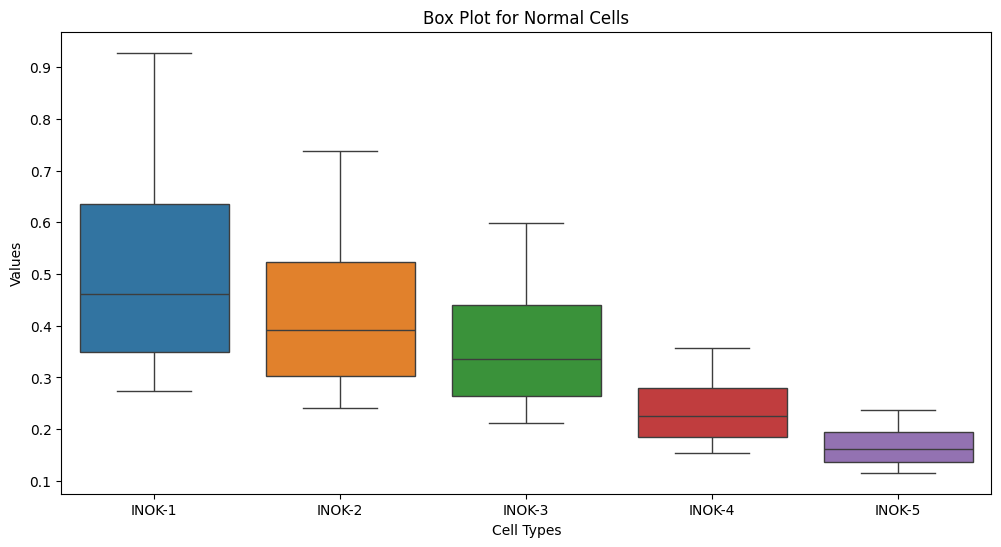

In [ ]:
# Box plots for normal cells
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_normal])
plt.title('Box Plot for Normal Cells')
plt.xlabel('Cell Types')
plt.ylabel('Values')
plt.show()

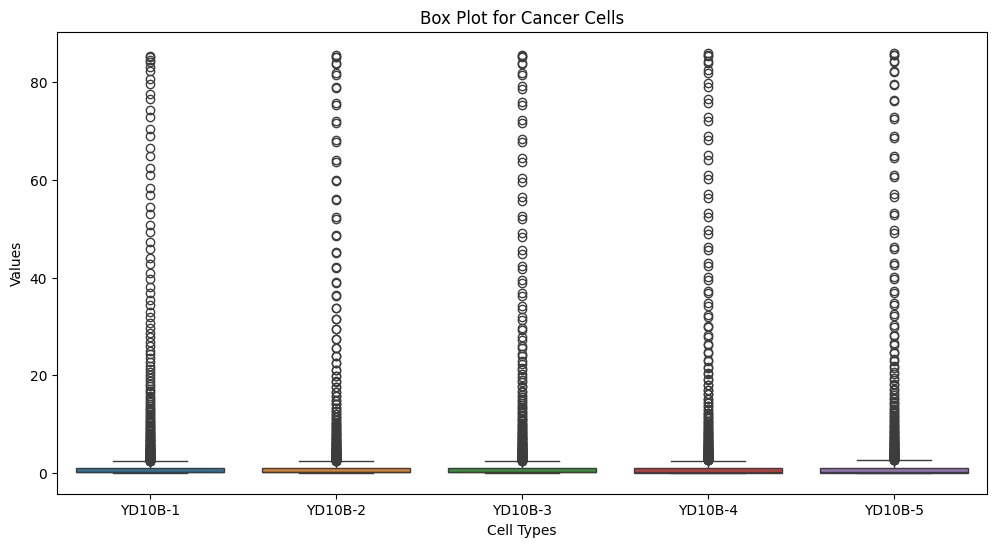

In [ ]:
# Box plots for cancer cells
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_cancer])
plt.title('Box Plot for Cancer Cells')
plt.xlabel('Cell Types')
plt.ylabel('Values')
plt.show()

**MODEL TRAINING**

**LINEAR REGRESSION**

In [18]:
# Extract features (wavelength) and targets (output for normal and cancer cells)
X = df[['Wavelength']]

# Assuming 'INOK-1', 'INOK-2', ..., 'YD10B-5' are the correct column names for cell outputs
columns_normal = ['INOK-1', 'INOK-2', 'INOK-3', 'INOK-4', 'INOK-5']
columns_cancer = ['YD10B-1', 'YD10B-2', 'YD10B-3', 'YD10B-4', 'YD10B-5']

# Extract normal and cancer cell outputs
y_normal = df[columns_normal]
y_cancer = df[columns_cancer]

In [19]:
# Split the dataset into training and testing sets for normal cells
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X, y_normal, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Create a linear regression model for normal cells
model_normal = LinearRegression()
model_normal.fit(X_train_normal, y_train_normal)

# Make predictions on the test set for normal cells
y_normal_pred = model_normal.predict(X_test_normal)

# Evaluate the model for normal cells
mse_normal = mean_squared_error(y_test_normal, y_normal_pred)
print(f'Mean Squared Error for Normal Cells: {mse_normal}')


Mean Squared Error for Normal Cells: 0.0006521172714097708


In [21]:
# Split the dataset into training and testing sets for cancer cells
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X, y_cancer, test_size=0.2, random_state=42)

# Create a linear regression model for cancer cells
model_cancer = LinearRegression()
model_cancer.fit(X_train_cancer, y_train_cancer)

# Make predictions on the test set for cancer cells
y_cancer_pred = model_cancer.predict(X_test_cancer)

# Evaluate the model for cancer cells
mse_cancer = mean_squared_error(y_test_cancer, y_cancer_pred)
print(f'Mean Squared Error for Cancer Cells: {mse_cancer}')

Mean Squared Error for Cancer Cells: 146.3648507851987


In [22]:
from sklearn.metrics import r2_score

# Calculate R-squared for normal cells
r2_normal = r2_score(y_test_normal, y_normal_pred)
print(f'R-squared for Normal Cells: {r2_normal}')

# Calculate R-squared for cancer cells
r2_cancer = r2_score(y_test_cancer, y_cancer_pred)
print(f'R-squared for Cancer Cells: {r2_cancer}')

R-squared for Normal Cells: 0.9631235278029985
R-squared for Cancer Cells: 0.03654789830287748


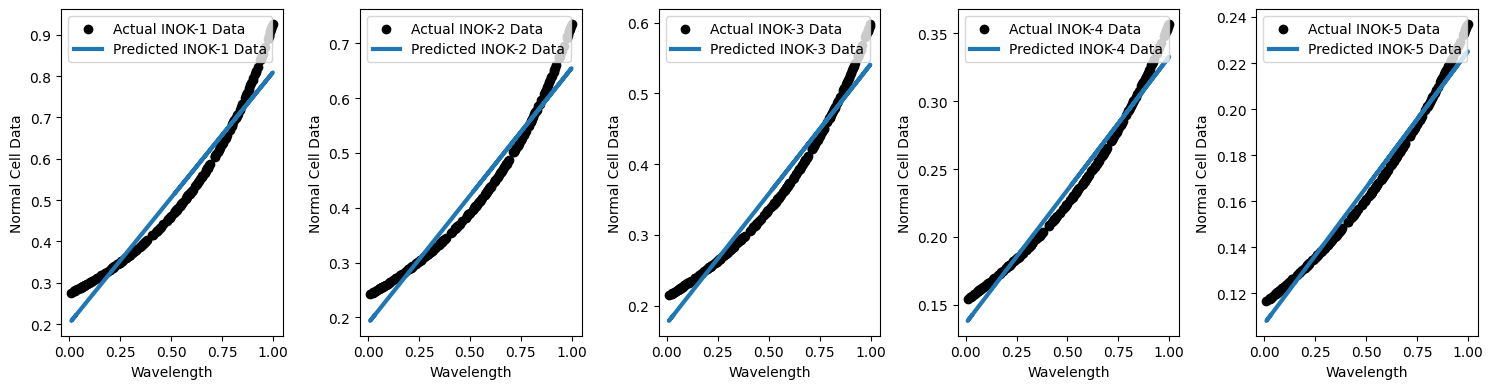

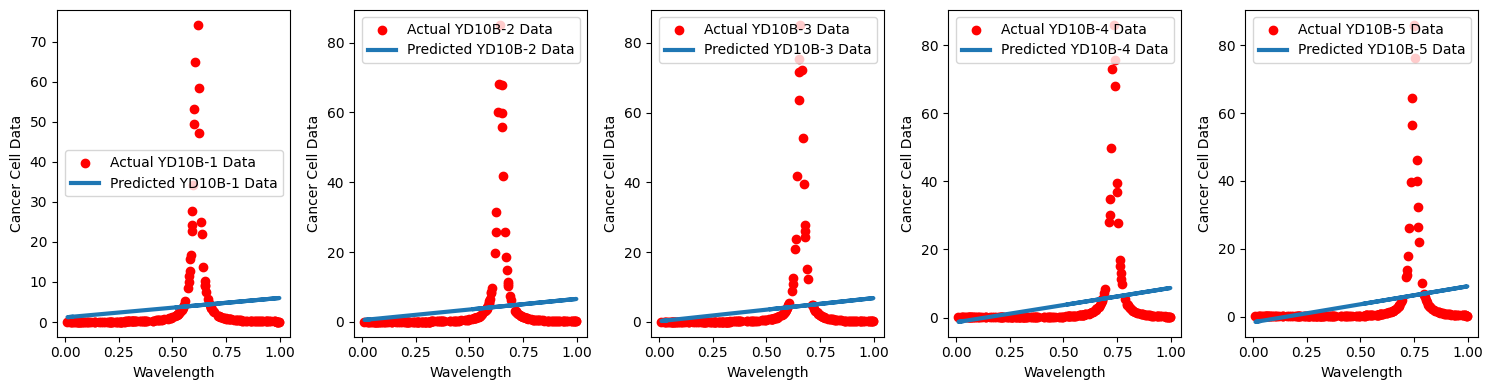

In [23]:
import matplotlib.pyplot as plt

# Optionally, you can visualize the results using matplotlib
fig, axes = plt.subplots(1, len(columns_normal), figsize=(15, 4))  # Adjust figsize as needed

# Plotting for Normal Cells
for i, column in enumerate(columns_normal):
    axes[i].scatter(X_test_normal['Wavelength'], y_test_normal[column], color='black', label=f'Actual {column} Data')
    axes[i].plot(X_test_normal['Wavelength'], y_normal_pred[:, i], linewidth=3, label=f'Predicted {column} Data')

    axes[i].set_xlabel('Wavelength')
    axes[i].set_ylabel('Normal Cell Data')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Optionally, you can visualize the results using matplotlib
fig, axes = plt.subplots(1, len(columns_cancer), figsize=(15, 4))  # Adjust figsize as needed

# Plotting for Cancer Cells
for i, column in enumerate(columns_cancer):
    axes[i].scatter(X_test_cancer['Wavelength'], y_test_cancer[column], color='red', label=f'Actual {column} Data')
    axes[i].plot(X_test_cancer['Wavelength'], y_cancer_pred[:, i], linewidth=3, label=f'Predicted {column} Data')

    axes[i].set_xlabel('Wavelength')
    axes[i].set_ylabel('Cancer Cell Data')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared for normal cells
r2_normal = r2_score(y_test_normal, y_normal_pred)
print(f'R-squared for Normal Cells: {r2_normal}')

# Calculate R-squared for cancer cells
r2_cancer = r2_score(y_test_cancer, y_cancer_pred)
print(f'R-squared for Cancer Cells: {r2_cancer}')

# Calculate Mean Absolute Error for normal cells
mae_normal = mean_absolute_error(y_test_normal, y_normal_pred)
print(f'Mean Absolute Error for Normal Cells: {mae_normal}')

# Calculate Mean Absolute Error for cancer cells
mae_cancer = mean_absolute_error(y_test_cancer, y_cancer_pred)
print(f'Mean Absolute Error for Cancer Cells: {mae_cancer}')

R-squared for Normal Cells: 0.9631235278029985
R-squared for Cancer Cells: 0.03654789830287748
Mean Absolute Error for Normal Cells: 0.01801584399207208
Mean Absolute Error for Cancer Cells: 5.409392347092864


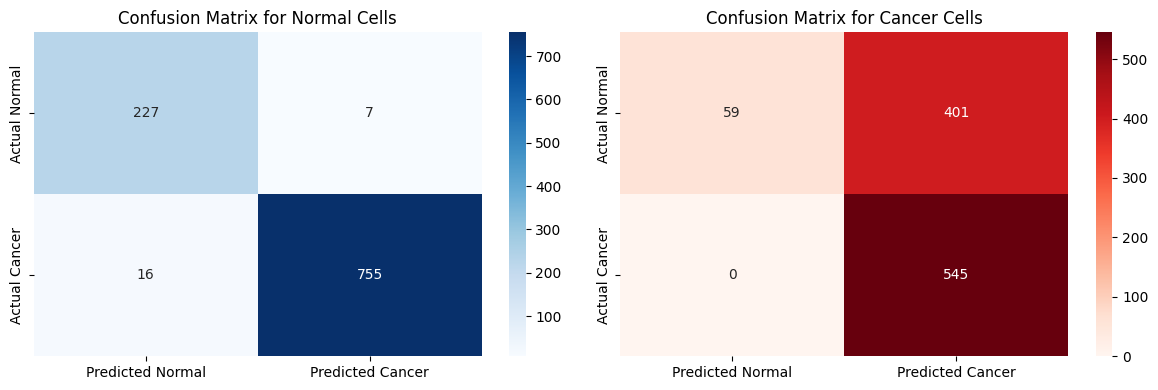

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example: Binary classification using a threshold
threshold = 0.2  # Adjust this threshold based on your problem

# Convert regression predictions to binary classifications
y_normal_binary = (y_normal_pred > threshold).astype(int)
y_test_normal_binary = (y_test_normal > threshold).astype(int)

y_cancer_binary = (y_cancer_pred > threshold).astype(int)
y_test_cancer_binary = (y_test_cancer > threshold).astype(int)

# Create confusion matrices
cm_normal = confusion_matrix(y_test_normal_binary.values.flatten(), y_normal_binary.flatten())
cm_cancer = confusion_matrix(y_test_cancer_binary.values.flatten(), y_cancer_binary.flatten())

# Plot confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Cancer'], yticklabels=['Actual Normal', 'Actual Cancer'])
plt.title('Confusion Matrix for Normal Cells')

plt.subplot(1, 2, 2)
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted Normal', 'Predicted Cancer'], yticklabels=['Actual Normal', 'Actual Cancer'])
plt.title('Confusion Matrix for Cancer Cells')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example: Binary classification using a threshold
threshold = 0.2  # Adjust this threshold based on your problem

# Convert regression predictions to binary classifications
y_normal_binary = (y_normal_pred > threshold).astype(int)
y_test_normal_binary = (y_test_normal > threshold).astype(int)

y_cancer_binary = (y_cancer_pred > threshold).astype(int)
y_test_cancer_binary = (y_test_cancer > threshold).astype(int)

# Calculate precision, recall, and F1 score for normal cells
precision_normal = precision_score(y_test_normal_binary.values.flatten(), y_normal_binary.flatten())
recall_normal = recall_score(y_test_normal_binary.values.flatten(), y_normal_binary.flatten())
f1_normal = f1_score(y_test_normal_binary.values.flatten(), y_normal_binary.flatten())

print(f'Precision for Normal Cells: {precision_normal}')
print(f'Recall for Normal Cells: {recall_normal}')
print(f'F1 Score for Normal Cells: {f1_normal}')

# Calculate precision, recall, and F1 score for cancer cells
precision_cancer = precision_score(y_test_cancer_binary.values.flatten(), y_cancer_binary.flatten())
recall_cancer = recall_score(y_test_cancer_binary.values.flatten(), y_cancer_binary.flatten())
f1_cancer = f1_score(y_test_cancer_binary.values.flatten(), y_cancer_binary.flatten())

print(f'Precision for Cancer Cells: {precision_cancer}')
print(f'Recall for Cancer Cells: {recall_cancer}')
print(f'F1 Score for Cancer Cells: {f1_cancer}')

Precision for Normal Cells: 0.9908136482939632
Recall for Normal Cells: 0.9792477302204928
F1 Score for Normal Cells: 0.984996738421396
Precision for Cancer Cells: 0.5761099365750528
Recall for Cancer Cells: 1.0
F1 Score for Cancer Cells: 0.7310529845741113


In [ ]:
from sklearn.metrics import accuracy_score

# Example: Binary classification using a threshold
threshold = 0.2  # Adjust this threshold based on your problem

# Convert regression predictions to binary classifications
y_normal_binary = (y_normal_pred > threshold).astype(int)
y_test_normal_binary = (y_test_normal > threshold).astype(int)

y_cancer_binary = (y_cancer_pred > threshold).astype(int)
y_test_cancer_binary = (y_test_cancer > threshold).astype(int)

# Calculate accuracy for normal cells
accuracy_normal = accuracy_score(y_test_normal_binary.values.flatten(), y_normal_binary.flatten())
print(f'Accuracy for Normal Cells: {accuracy_normal}')

# Calculate accuracy for cancer cells
accuracy_cancer = accuracy_score(y_test_cancer_binary.values.flatten(), y_cancer_binary.flatten())
print(f'Accuracy for Cancer Cells: {accuracy_cancer}')


Accuracy for Normal Cells: 0.9771144278606965
Accuracy for Cancer Cells: 0.6009950248756218


**RANDOMFOREST REGRESSION**

Mean Squared Error for Normal Cells (RF): 7.393502589285517e-08
R-squared for Normal Cells (RF): 0.9999949401820443
Mean Absolute Error for Normal Cells (RF): 0.0001914901887562127
Mean Squared Error for Cancer Cells (RF): 0.11243547155150709
R-squared for Cancer Cells (RF): 0.9992431657055396
Mean Absolute Error for Cancer Cells (RF): 0.08786056632937282


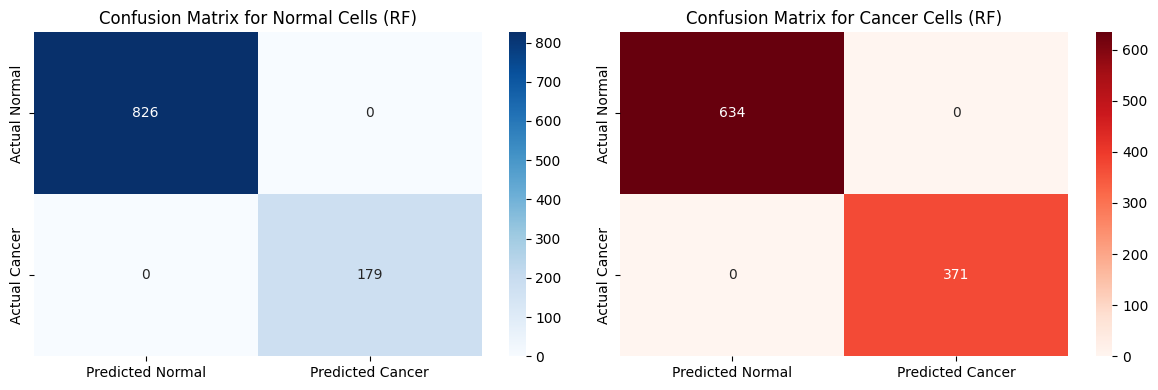

Accuracy for Normal Cells (RF): 1.0
Accuracy for Cancer Cells (RF): 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Extract features (wavelength) and targets (output for normal and cancer cells)
X = df[['Wavelength']]
y_normal = df[columns_normal]
y_cancer = df[columns_cancer]

# Split the dataset into training and testing sets for normal cells
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X, y_normal, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model for normal cells
model_normal_rf = RandomForestRegressor(random_state=42)
model_normal_rf.fit(X_train_normal, y_train_normal)

# Make predictions on the test set for normal cells
y_normal_pred_rf = model_normal_rf.predict(X_test_normal)

# Evaluate the model for normal cells
mse_normal_rf = mean_squared_error(y_test_normal, y_normal_pred_rf)
r2_normal_rf = r2_score(y_test_normal, y_normal_pred_rf)
mae_normal_rf = mean_absolute_error(y_test_normal, y_normal_pred_rf)

print(f'Mean Squared Error for Normal Cells (RF): {mse_normal_rf}')
print(f'R-squared for Normal Cells (RF): {r2_normal_rf}')
print(f'Mean Absolute Error for Normal Cells (RF): {mae_normal_rf}')

# Split the dataset into training and testing sets for cancer cells
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X, y_cancer, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model for cancer cells
model_cancer_rf = RandomForestRegressor(random_state=42)
model_cancer_rf.fit(X_train_cancer, y_train_cancer)

# Make predictions on the test set for cancer cells
y_cancer_pred_rf = model_cancer_rf.predict(X_test_cancer)

# Evaluate the model for cancer cells
mse_cancer_rf = mean_squared_error(y_test_cancer, y_cancer_pred_rf)
r2_cancer_rf = r2_score(y_test_cancer, y_cancer_pred_rf)
mae_cancer_rf = mean_absolute_error(y_test_cancer, y_cancer_pred_rf)

print(f'Mean Squared Error for Cancer Cells (RF): {mse_cancer_rf}')
print(f'R-squared for Cancer Cells (RF): {r2_cancer_rf}')
print(f'Mean Absolute Error for Cancer Cells (RF): {mae_cancer_rf}')

# Example: Binary classification using a threshold
threshold_rf = 0.5  # Adjust this threshold based on your problem

# Convert regression predictions to binary classifications for Random Forest
y_normal_binary_rf = (y_normal_pred_rf > threshold_rf).astype(int)
y_test_normal_binary_rf = (y_test_normal > threshold_rf).astype(int)

y_cancer_binary_rf = (y_cancer_pred_rf > threshold_rf).astype(int)
y_test_cancer_binary_rf = (y_test_cancer > threshold_rf).astype(int)

# Create confusion matrices for Random Forest
cm_normal_rf = confusion_matrix(y_test_normal_binary_rf.values.flatten(), y_normal_binary_rf.flatten())
cm_cancer_rf = confusion_matrix(y_test_cancer_binary_rf.values.flatten(), y_cancer_binary_rf.flatten())

# Plot confusion matrices using seaborn heatmap for Random Forest
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_normal_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Cancer'], yticklabels=['Actual Normal', 'Actual Cancer'])
plt.title('Confusion Matrix for Normal Cells (RF)')

plt.subplot(1, 2, 2)
sns.heatmap(cm_cancer_rf, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted Normal', 'Predicted Cancer'], yticklabels=['Actual Normal', 'Actual Cancer'])
plt.title('Confusion Matrix for Cancer Cells (RF)')

plt.tight_layout()
plt.show()

# Calculate accuracy for normal cells (RF)
accuracy_normal_rf = accuracy_score(y_test_normal_binary_rf.values.flatten(), y_normal_binary_rf.flatten())
print(f'Accuracy for Normal Cells (RF): {accuracy_normal_rf}')

# Calculate accuracy for cancer cells (RF)
accuracy_cancer_rf = accuracy_score(y_test_cancer_binary_rf.values.flatten(), y_cancer_binary_rf.flatten())
print(f'Accuracy for Cancer Cells (RF): {accuracy_cancer_rf}')


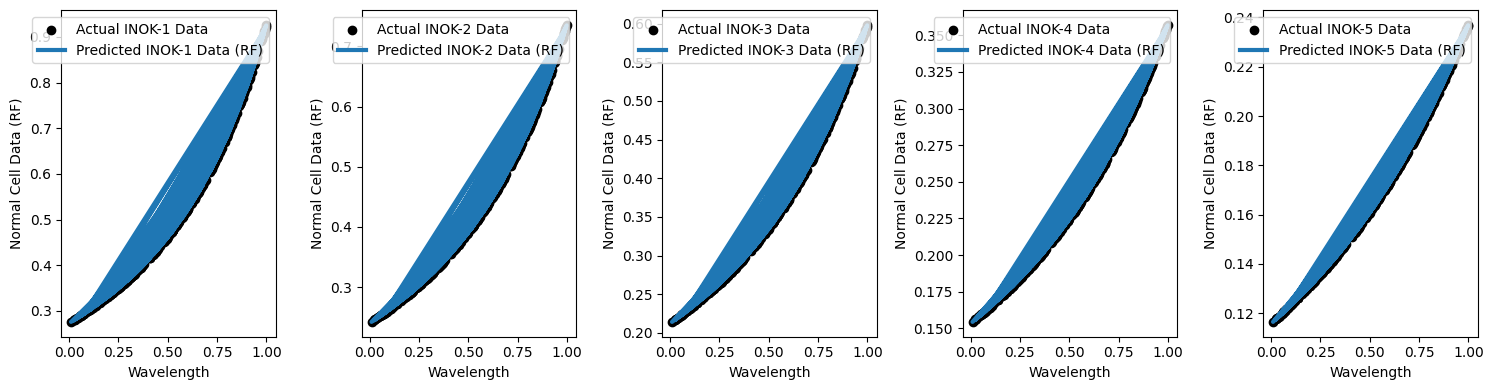

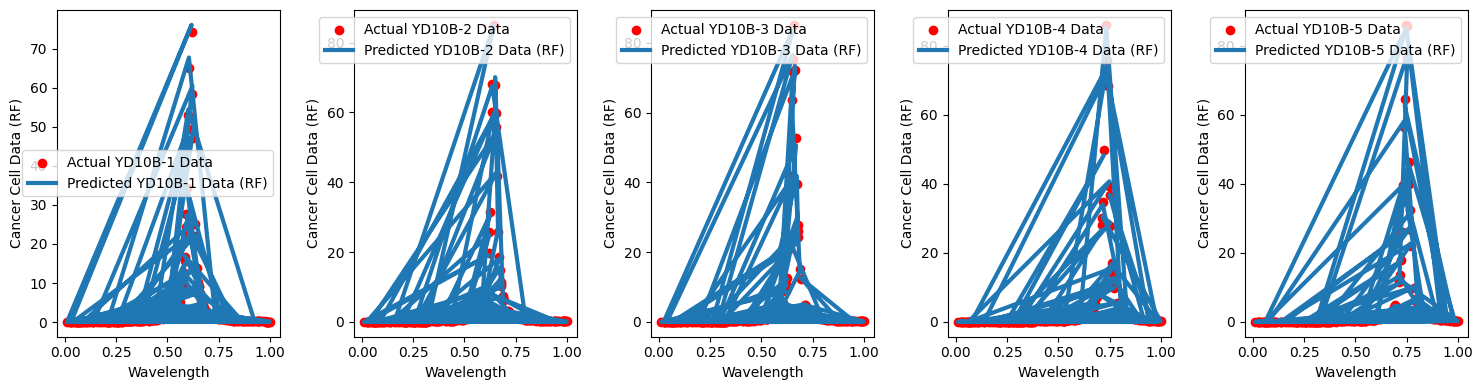

In [ ]:
import matplotlib.pyplot as plt

# Visualize the results for normal cells (RF)
fig, axes = plt.subplots(1, len(columns_normal), figsize=(15, 4))  # Adjust figsize as needed

for i, column in enumerate(columns_normal):
    axes[i].scatter(X_test_normal['Wavelength'], y_test_normal[column], color='black', label=f'Actual {column} Data')
    axes[i].plot(X_test_normal['Wavelength'], y_normal_pred_rf[:, i], linewidth=3, label=f'Predicted {column} Data (RF)')

    axes[i].set_xlabel('Wavelength')
    axes[i].set_ylabel('Normal Cell Data (RF)')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Visualize the results for cancer cells (RF)
fig, axes = plt.subplots(1, len(columns_cancer), figsize=(15, 4))  # Adjust figsize as needed

for i, column in enumerate(columns_cancer):
    axes[i].scatter(X_test_cancer['Wavelength'], y_test_cancer[column], color='red', label=f'Actual {column} Data')
    axes[i].plot(X_test_cancer['Wavelength'], y_cancer_pred_rf[:, i], linewidth=3, label=f'Predicted {column} Data (RF)')

    axes[i].set_xlabel('Wavelength')
    axes[i].set_ylabel('Cancer Cell Data (RF)')
    axes[i].legend()

plt.tight_layout()
plt.show()


**DECISION TREE**

Mean Squared Error for Normal Cells (DT): 2.3187387228441038e-07
R-squared for Normal Cells (DT): 0.9999840734864559
Mean Absolute Error for Normal Cells (DT): 0.0003826597223880598
Mean Squared Error for Cancer Cells (DT): 0.49797464703865907
R-squared for Cancer Cells (DT): 0.9966532295709515
Mean Absolute Error for Cancer Cells (DT): 0.19238088475323384


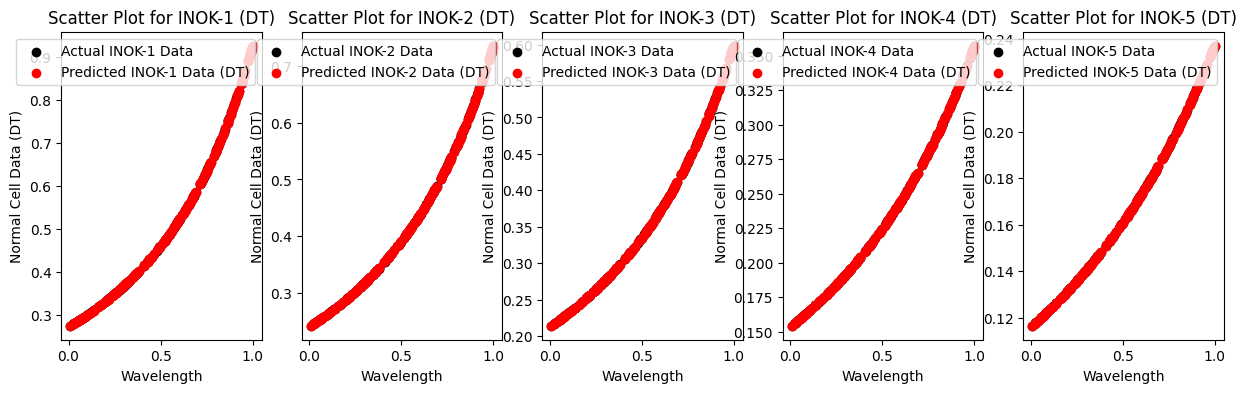

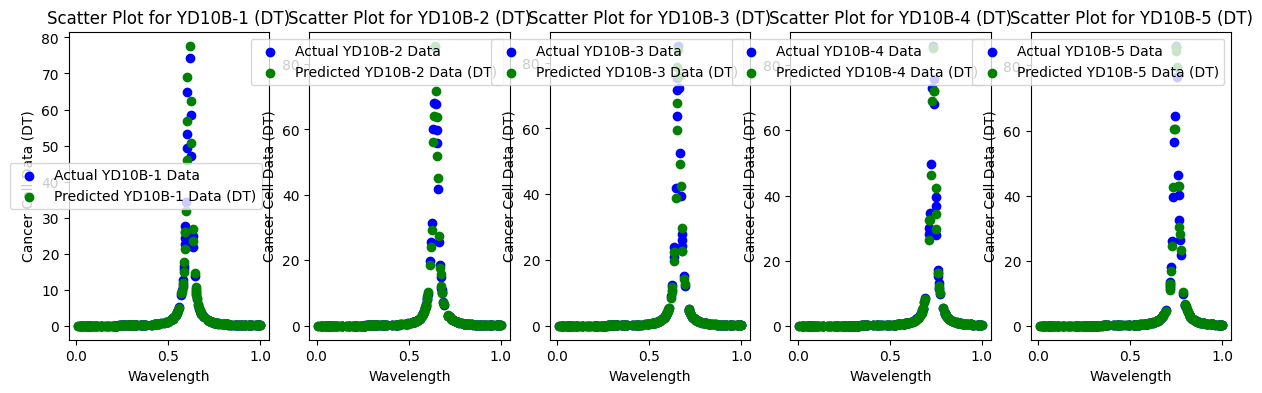

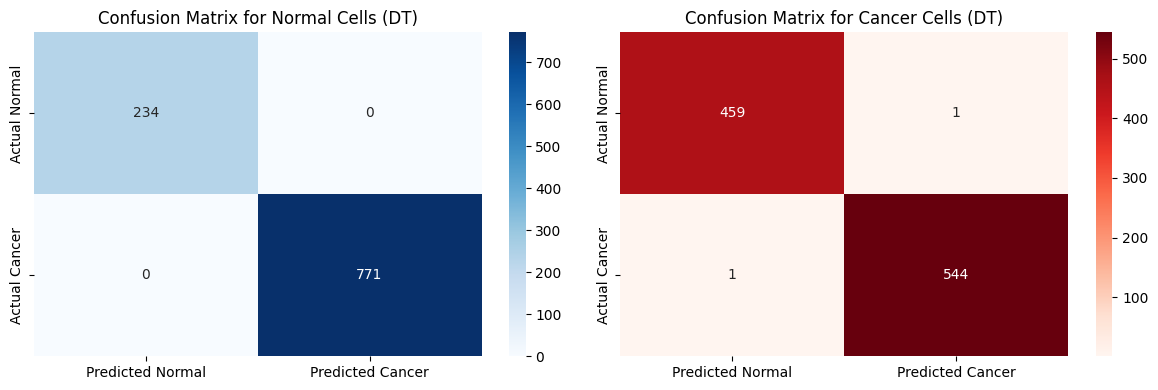

Precision for Normal Cells (DT): 1.0
Recall for Normal Cells (DT): 1.0
F1 Score for Normal Cells (DT): 1.0
Accuracy for Normal Cells (DT): 1.0
Precision for Cancer Cells (DT): 0.998165137614679
Recall for Cancer Cells (DT): 0.998165137614679
F1 Score for Cancer Cells (DT): 0.998165137614679
Accuracy for Cancer Cells (DT): 0.9980099502487563


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Create a Decision Tree Regressor model for normal cells
model_dt_normal = DecisionTreeRegressor(random_state=42)
model_dt_normal.fit(X_train_normal, y_train_normal)

# Make predictions on the test set for normal cells
y_dt_normal_pred = model_dt_normal.predict(X_test_normal)

# Evaluate the model for normal cells
mse_dt_normal = mean_squared_error(y_test_normal, y_dt_normal_pred)
r2_dt_normal = r2_score(y_test_normal, y_dt_normal_pred)
mae_dt_normal = mean_absolute_error(y_test_normal, y_dt_normal_pred)

print(f'Mean Squared Error for Normal Cells (DT): {mse_dt_normal}')
print(f'R-squared for Normal Cells (DT): {r2_dt_normal}')
print(f'Mean Absolute Error for Normal Cells (DT): {mae_dt_normal}')

# Create a Decision Tree Regressor model for cancer cells
model_dt_cancer = DecisionTreeRegressor(random_state=42)
model_dt_cancer.fit(X_train_cancer, y_train_cancer)

# Make predictions on the test set for cancer cells
y_dt_cancer_pred = model_dt_cancer.predict(X_test_cancer)

# Evaluate the model for cancer cells
mse_dt_cancer = mean_squared_error(y_test_cancer, y_dt_cancer_pred)
r2_dt_cancer = r2_score(y_test_cancer, y_dt_cancer_pred)
mae_dt_cancer = mean_absolute_error(y_test_cancer, y_dt_cancer_pred)

print(f'Mean Squared Error for Cancer Cells (DT): {mse_dt_cancer}')
print(f'R-squared for Cancer Cells (DT): {r2_dt_cancer}')
print(f'Mean Absolute Error for Cancer Cells (DT): {mae_dt_cancer}')

import matplotlib.pyplot as plt

# Visualize the results for normal cells (DT)
fig, axes = plt.subplots(1, len(columns_normal), figsize=(15, 4))  # Adjust figsize as needed

for i, column in enumerate(columns_normal):
    axes[i].scatter(X_test_normal['Wavelength'], y_test_normal[column], color='black', label=f'Actual {column} Data')
    axes[i].scatter(X_test_normal['Wavelength'], y_dt_normal_pred[:, i], color='red', label=f'Predicted {column} Data (DT)')

    axes[i].set_xlabel('Wavelength')
    axes[i].set_ylabel('Normal Cell Data (DT)')
    axes[i].legend()
    axes[i].set_title(f'Scatter Plot for {column} (DT)')

plt.show()

# Visualize the results for cancer cells (DT)
fig, axes = plt.subplots(1, len(columns_cancer), figsize=(15, 4))  # Adjust figsize as needed

for i, column in enumerate(columns_cancer):
    axes[i].scatter(X_test_cancer['Wavelength'], y_test_cancer[column], color='blue', label=f'Actual {column} Data')
    axes[i].scatter(X_test_cancer['Wavelength'], y_dt_cancer_pred[:, i], color='green', label=f'Predicted {column} Data (DT)')

    axes[i].set_xlabel('Wavelength')
    axes[i].set_ylabel('Cancer Cell Data (DT)')
    axes[i].legend()
    axes[i].set_title(f'Scatter Plot for {column} (DT)')

plt.show()


# Convert regression predictions to binary classifications using a threshold
threshold = 0.2

y_dt_normal_binary = (y_dt_normal_pred > threshold).astype(int)
y_test_normal_binary = (y_test_normal > threshold).astype(int)

y_dt_cancer_binary = (y_dt_cancer_pred > threshold).astype(int)
y_test_cancer_binary = (y_test_cancer > threshold).astype(int)

# Create confusion matrices
cm_dt_normal = confusion_matrix(y_test_normal_binary.values.flatten(), y_dt_normal_binary.flatten())
cm_dt_cancer = confusion_matrix(y_test_cancer_binary.values.flatten(), y_dt_cancer_binary.flatten())

# Plot confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt_normal, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Cancer'], yticklabels=['Actual Normal', 'Actual Cancer'])
plt.title('Confusion Matrix for Normal Cells (DT)')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_cancer, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted Normal', 'Predicted Cancer'], yticklabels=['Actual Normal', 'Actual Cancer'])
plt.title('Confusion Matrix for Cancer Cells (DT)')

plt.tight_layout()
plt.show()

# Calculate precision, recall, F1 score, and accuracy for normal cells
precision_dt_normal = precision_score(y_test_normal_binary.values.flatten(), y_dt_normal_binary.flatten())
recall_dt_normal = recall_score(y_test_normal_binary.values.flatten(), y_dt_normal_binary.flatten())
f1_dt_normal = f1_score(y_test_normal_binary.values.flatten(), y_dt_normal_binary.flatten())
accuracy_dt_normal = accuracy_score(y_test_normal_binary.values.flatten(), y_dt_normal_binary.flatten())

print(f'Precision for Normal Cells (DT): {precision_dt_normal}')
print(f'Recall for Normal Cells (DT): {recall_dt_normal}')
print(f'F1 Score for Normal Cells (DT): {f1_dt_normal}')
print(f'Accuracy for Normal Cells (DT): {accuracy_dt_normal}')

# Calculate precision, recall, F1 score, and accuracy for cancer cells
precision_dt_cancer = precision_score(y_test_cancer_binary.values.flatten(), y_dt_cancer_binary.flatten())
recall_dt_cancer = recall_score(y_test_cancer_binary.values.flatten(), y_dt_cancer_binary.flatten())
f1_dt_cancer = f1_score(y_test_cancer_binary.values.flatten(), y_dt_cancer_binary.flatten())
accuracy_dt_cancer = accuracy_score(y_test_cancer_binary.values.flatten(), y_dt_cancer_binary.flatten())

print(f'Precision for Cancer Cells (DT): {precision_dt_cancer}')
print(f'Recall for Cancer Cells (DT): {recall_dt_cancer}')
print(f'F1 Score for Cancer Cells (DT): {f1_dt_cancer}')
print(f'Accuracy for Cancer Cells (DT): {accuracy_dt_cancer}')


**PREDICTIONS**

For Normal Cells:

In [ ]:
import numpy as np

# Assuming you have a single input value for 'Wavelength'
input_wavelength = 11.38  # Replace this with your actual input

# Reshape the input for prediction
input_wavelength = np.array(input_wavelength).reshape(-1, 1)

# Predict using Linear Regression
lr_feature_names = ['Wavelength']
input_wavelength_lr = pd.DataFrame(input_wavelength, columns=lr_feature_names)
lr_prediction = model_normal.predict(input_wavelength_lr)
print(f'Linear Regression Prediction for Normal Cells: {lr_prediction}')

# Predict using Random Forest
rf_feature_names = ['Wavelength']
input_wavelength_rf = pd.DataFrame(input_wavelength, columns=rf_feature_names)
rf_prediction = model_normal_rf.predict(input_wavelength_rf)
print(f'Random Forest Prediction for Normal Cells: {rf_prediction}')

# For Decision Tree, you need to provide feature names
dt_feature_names = ['Wavelength']
input_wavelength_dt = pd.DataFrame(input_wavelength, columns=dt_feature_names)
dt_prediction = model_dt_normal.predict(input_wavelength_dt)
print(f'Decision Tree Prediction for Normal Cells: {dt_prediction}')


Linear Regression Prediction for Normal Cells: [[7.11329691 5.49599755 4.3435649  2.37646986 1.45252822]]
Random Forest Prediction for Normal Cells: [[0.92621183 0.73573863 0.59843128 0.35710115 0.23699804]]
Decision Tree Prediction for Normal Cells: [[0.92778915 0.73685849 0.59925478 0.35748308 0.23720562]]



For Cancer Cells:

In [ ]:
import numpy as np

# Assuming you have a single input value for 'Wavelength'
input_wavelength = 11.38  # Replace this with your actual input

# Reshape the input for prediction
input_wavelength = np.array(input_wavelength).reshape(-1, 1)

# Linear Regression Prediction for Cancer Cells
lr_feature_names_cancer = ['Wavelength']
input_wavelength_lr_cancer = pd.DataFrame(input_wavelength, columns=lr_feature_names_cancer)
y_cancer_lr_prediction = model_cancer.predict(input_wavelength_lr_cancer)
print(f'Linear Regression Prediction for Cancer Cells: {y_cancer_lr_prediction}')

# Random Forest Prediction for Cancer Cells
rf_feature_names_cancer = ['Wavelength']
input_wavelength_rf_cancer = pd.DataFrame(input_wavelength, columns=rf_feature_names_cancer)
y_cancer_rf_prediction = model_cancer_rf.predict(input_wavelength_rf_cancer)
print(f'Random Forest Prediction for Cancer Cells: {y_cancer_rf_prediction}')

# Decision Tree Prediction for Cancer Cells
dt_feature_names_cancer = ['Wavelength']
input_wavelength_dt_cancer = pd.DataFrame(input_wavelength, columns=dt_feature_names_cancer)
y_cancer_dt_prediction = model_dt_cancer.predict(input_wavelength_dt_cancer)
print(f'Decision Tree Prediction for Cancer Cells: {y_cancer_dt_prediction}')


Linear Regression Prediction for Cancer Cells: [[ 56.29560178  69.53105494  75.59211817 113.2049049  118.8523071 ]]
Random Forest Prediction for Cancer Cells: [[0.11941487 0.1407323  0.15359013 0.25449028 0.28640679]]
Decision Tree Prediction for Cancer Cells: [[0.11881072 0.13995587 0.15270288 0.25257581 0.28411562]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Assuming you have trained models: model_normal, model_normal_rf, model_dt_normal for normal cells
# and model_cancer, model_cancer_rf, model_dt_cancer for cancer cells
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Assuming you have a single input value for 'Wavelength'
input_wavelength = 11.75  # Replace this with your actual input

# Reshape the input for prediction
input_wavelength = np.array(input_wavelength).reshape(-1, 1)

# Linear Regression Prediction for Normal Cells
lr_prediction = model_normal.predict(input_wavelength)
feature_names = ['Wavelength']
# Random Forest Prediction for Normal Cells
# Assuming 'feature_names' is a list containing the feature names (e.g., ['Wavelength'])
input_wavelength_with_names_lr = pd.DataFrame(input_wavelength, columns=feature_names)
lr_prediction_with_names = model_normal.predict(input_wavelength_with_names_lr)

# Decision Tree Prediction for Normal Cells
# Assuming 'feature_names' is a list containing the feature names (e.g., ['Wavelength'])
feature_names = ['Wavelength']
input_wavelength_with_names = pd.DataFrame(input_wavelength, columns=feature_names)
dt_prediction = model_dt_normal.predict(input_wavelength_with_names)

# Predict using Linear Regression for Cancer Cells
y_cancer_lr_prediction = model_cancer.predict(input_wavelength)

# Predict using Random Forest for Cancer Cells
# Assuming 'feature_names' is a list containing the feature names (e.g., ['Wavelength'])
input_wavelength_with_names_rf = pd.DataFrame(input_wavelength, columns=feature_names)
y_cancer_rf_prediction_with_names = model_cancer_rf.predict(input_wavelength_with_names_rf)

# Predict using Decision Tree for Cancer Cells
input_wavelength_with_names_cancer = pd.DataFrame(input_wavelength, columns=feature_names)
y_cancer_dt_prediction = model_dt_cancer.predict(input_wavelength_with_names_cancer)

# Function to determine cell type (Normal or Cancer)
def get_cell_type(prediction, threshold):
    # Check if the maximum value in the prediction is above the threshold
    if prediction.max() < threshold:
        return 'Cancer'
    else:
        return 'Normal'

threshold = 0.3  # Adjust this threshold based on your problem

# Linear Regression Cell Type Determination
lr_cell_type = get_cell_type(lr_prediction[0], threshold)
print(f'Linear Regression Prediction for Normal Cells: {lr_prediction[0]}, Cell Type: {lr_cell_type}')

# Random Forest Cell Type Determination
lr_cell_type_with_names = get_cell_type(lr_prediction_with_names[0], threshold)
print(f'Linear Regression Prediction for Normal Cells (with names): {lr_prediction_with_names[0]}, Cell Type: {lr_cell_type_with_names}')

# Decision Tree Cell Type Determination
dt_cell_type = get_cell_type(dt_prediction[0], threshold)
print(f'Decision Tree Prediction for Normal Cells: {dt_prediction[0]}, Cell Type: {dt_cell_type}')

# Linear Regression Cell Type Determination for Cancer Cells
lr_cancer_cell_type = get_cell_type(y_cancer_lr_prediction[0], threshold)
print(f'Linear Regression Prediction for Cancer Cells: {y_cancer_lr_prediction[0]}, Cell Type: {lr_cancer_cell_type}')

# Random Forest Cell Type Determination for Cancer Cells
rf_cancer_cell_type_with_names = get_cell_type(y_cancer_rf_prediction_with_names[0], threshold)
print(f'Random Forest Prediction for Cancer Cells (with names): {y_cancer_rf_prediction_with_names[0]}, Cell Type: {rf_cancer_cell_type_with_names}')

# Decision Tree Cell Type Determination for Cancer Cells
dt_cancer_cell_type = get_cell_type(y_cancer_dt_prediction[0], threshold)
print(f'Decision Tree Prediction for Cancer Cells: {y_cancer_dt_prediction[0]}, Cell Type: {dt_cancer_cell_type}')


Linear Regression Prediction for Normal Cells: [7.33801207 5.66855259 4.47910742 2.44930915 1.49627895], Cell Type: Normal
Linear Regression Prediction for Normal Cells (with names): [7.33801207 5.66855259 4.47910742 2.44930915 1.49627895], Cell Type: Normal
Decision Tree Prediction for Normal Cells: [0.92778915 0.73685849 0.59925478 0.35748308 0.23720562], Cell Type: Normal
Linear Regression Prediction for Cancer Cells: [ 58.08823634  71.77416141  78.04281586 116.93027423 122.77118117], Cell Type: Normal
Random Forest Prediction for Cancer Cells (with names): [0.11941487 0.1407323  0.15359013 0.25449028 0.28640679], Cell Type: Cancer
Decision Tree Prediction for Cancer Cells: [0.11881072 0.13995587 0.15270288 0.25257581 0.28411562], Cell Type: Cancer
